# Diversity test

In [79]:
%pylab --n
%matplotlib inline

import seaborn as sns
import pandas as pd
sns.set_palette('colorblind')
import birdsonganalysis as bsa
from os.path import join, exists, basename
from scipy.io import wavfile
import pickle
import json
from pprint import pprint
import warnings
from IPython.display import Audio, display, Markdown

import sys

sys.path.append('../model/')

from song_fitter import SongModel, get_scores
import synth
from synth import synthesize
from measures import bsa_measure

def comp(a, b):
    return np.linalg.norm(a - b)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [80]:
path = '../model/res/microbial_extended_diversity_test_170512_170035/'
if exists(join(path, 'aborted.txt')):
    warnings.warn('Aborted run')
if not exists(join(path, 'data.pkl')):
    warnings.warn('Run is not finished')

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Run is not finished
  """


In [81]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
try:
    with open(join(path, 'conf.json'), 'r') as f:
        run_param = json.load(f)
except FileNotFoundError:
    with open(join(path, 'params.json'), 'r') as f:
        run_param = json.load(f)

In [82]:
out = '| key | value |\n|---|---|\n' + '\n'.join(['| {} | {} |'.format(key, run_param[key]) for key in sorted(run_param.keys())])
display(Markdown(out))

| key | value |
|---|---|
| #comment | ['def of sin param : (a * t + b) * sin((t + phase) * f * 2 * pi)', 'Format of each list', '```', '#alpha', 'a, b, phase, f  #sin 1', 'a, b, phase, f  #sin 2', 'a, b, phase, f  #sin 3', 'cst', '#beta', 'a, b, phase, f, cst', '```', 'really ugly way to comment in json, sorry.'] |
| coefs | {'fm': 1, 'goodness': 1, 'pitch': 1, 'am': 1, 'entropy': 1, 'amplitude': 1} |
| commit | 730df956c25af5fdf83bae6faad74407072f7499 |
| comp | linalg |
| concurrent | 10 |
| days | 50 |
| dev | [0.1, 0.1, 0.05, 1, 0.05, 0.05, 0.05, 1, 0.001, 0.001, 0.005, 100, 0.2, 0.05, 0.01, 0.05, 1, 0.005] |
| dlm | optimise_gesture_padded |
| iter_per_train | 20 |
| maxs | [50, 4, 3.141592653589793, 40000, 50, 4, 3.141592653589793, 40000, 50, 5, 3.141592653589793, 40000, 10, 50, 3, 3.141592653589793, 1000, 2] |
| mins | [-50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -5, -50, 0, -3.141592653589793, 0, -3] |
| name | microbial_extended_diversity_test |
| nb_pad | 2 |
| night_concurrent | 50 |
| nlm | mutate_microbial_extended_uniform |
| prior | [0, 0, 3.141592653589793, 15, 0, 0, 0.39269908169872414, 45, 0, 0, 0, 5000, 0.0, 0, 0, 0, 0, 0] |
| replay | 200 |
| seed | 1494601235 |
| train_per_day | 100 |
| tutor | ../data/ba_example.wav |

In [83]:
try:
    with open(join(path, 'data.pkl'), 'rb') as f:
        songlog = pickle.load(f)
except FileNotFoundError:
    warnings.warn('warning, learning not over')
    with open(join(path, 'data_cur.pkl'), 'rb') as f:
        songlog = pickle.load(f)

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: warning, learning not over
  """


In [84]:
night_data = [item[1] for item in songlog if item[0] == 'night']
nd = pd.DataFrame(night_data)

In [85]:
nd

,cond,pop
0,before_evening,[<song_model.SongModel object at 0x7fb81c6fc4e...
1,evening,[<song_model.SongModel object at 0x7fb81c770d6...
2,before_morning,[<song_model.SongModel object at 0x7fb81c6c52b...
3,morning,[<song_model.SongModel object at 0x7fb81636cb7...
4,before_evening,[<song_model.SongModel object at 0x7fb8163090b...
5,evening,[<song_model.SongModel object at 0x7fb8162bc20...
6,before_morning,[<song_model.SongModel object at 0x7fb8161b974...
7,morning,[<song_model.SongModel object at 0x7fb8160b658...
8,before_evening,[<song_model.SongModel object at 0x7fb81604e66...
9,evening,[<song_model.SongModel object at 0x7fb81600166...


In [86]:
scores = []
for i, row in nd.iterrows():
    print (i)
    scores.append(get_scores(tutor, nd.iloc[i]['pop'], lambda x: bsa_measure(x, sr, coefs=run_param['coefs']), comp))
nd['scores'] = scores

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [87]:
nd

,cond,pop,scores
0,before_evening,[<song_model.SongModel object at 0x7fb81c6fc4e...,"[247.631426015, 320.892747632, 238.239833018, ..."
1,evening,[<song_model.SongModel object at 0x7fb81c770d6...,"[233.901366567, 322.547756971, 245.847051424, ..."
2,before_morning,[<song_model.SongModel object at 0x7fb81c6c52b...,"[223.566673879, 223.566673879, 223.566673879, ..."
3,morning,[<song_model.SongModel object at 0x7fb81636cb7...,"[223.582253937, 223.566673879, 225.31234418, 2..."
4,before_evening,[<song_model.SongModel object at 0x7fb8163090b...,"[234.51138602, 223.269300739, 230.953158459, 2..."
5,evening,[<song_model.SongModel object at 0x7fb8162bc20...,"[220.360012947, 223.269300739, 234.36398093, 2..."
6,before_morning,[<song_model.SongModel object at 0x7fb8161b974...,"[211.477163579, 212.887601372, 211.944052729, ..."
7,morning,[<song_model.SongModel object at 0x7fb8160b658...,"[211.477163579, 208.713127887, 208.738436352, ..."
8,before_evening,[<song_model.SongModel object at 0x7fb81604e66...,"[217.083462969, 211.232830738, 207.229599132, ..."
9,evening,[<song_model.SongModel object at 0x7fb81600166...,"[210.757379778, 205.128030281, 210.547486656, ..."


In [88]:
songs_score = []
for i, row in nd.iterrows():
    for song, score in zip(nd.iloc[i]['pop'], nd.iloc[i]['scores']):
        songs_score.append({'i': i, 'score': score, 'cond': nd.iloc[i]['cond']})

scores_df = pd.DataFrame(songs_score)

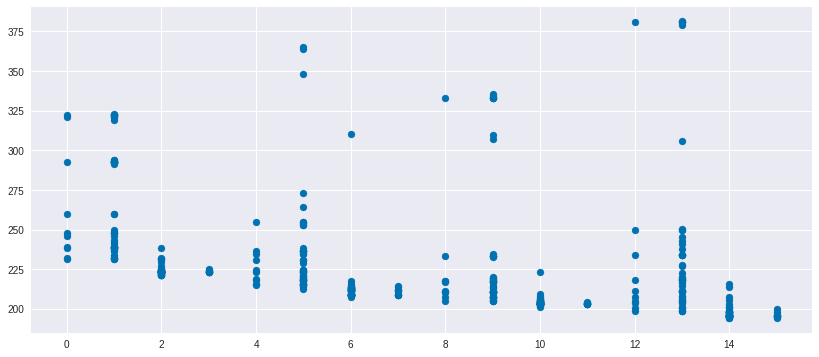

In [93]:
plt.figure(figsize=(14, 6))
plt.scatter(scores_df['i'], scores_df['score'])

In [90]:
songs = nd.iloc[2]['pop']

In [100]:
from bisect import bisect_left

In [102]:
nb_close = 0
for isong, song in enumerate(songs[1:]):
    song_dist = 0
    other = [gesture[0] for gesture in song.gestures]
    for i, gesture in enumerate(songs[0].gestures):
        start = gesture[0]
        near_i = bisect_left(other, start)
        if near_i >= len(other) - 1:
            near_i = len(other) - 2
        cur_dist = np.min((np.abs(start - other[near_i]), np.abs(start - other[near_i+1])))
        song_dist += cur_dist
    if song_dist < 2000:
        nb_close += 1


100 loops, best of 3: 10.9 ms per loop
